In [1]:
from __future__ import print_function

# Handle data
import json
import operator
import collections
import re

# Handle table-like data 
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
import pandas as pd
ewg_ing_df = pd.read_json('ingredients_products_keys_fixed/ewg_ingredients.json', orient = 'index')

In [3]:
print(ewg_ing_df.iloc[1])

allergy_imm_tox_score                                                    0
cancer_score                                                             0
data_availability                                                     None
dev_reprod_tox_score                                                     0
function_list                                                          NaN
ingredient_id            L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0MDA1L01PTkFSRE...
ingredient_name                          MONARDA FISTULOSA (WILD BERGAMOT)
ingredient_score                                                         1
overall_hazard_score                                                    19
synonym_list                                                           NaN
url                      http://www.ewg.org/skindeep/ingredient/704005/...
use_restrict_score                                                       0
Name: L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0MDA1L01PTkFSREFfRklTVFVMT1NBXyUyOFdJTERfQkVSR0FNT1QlMjkv, dtyp

In [4]:
ing_map = {}
for i in range(len(ewg_ing_df)):
    ID = ewg_ing_df.iloc[i]['ingredient_id']
    name = ewg_ing_df.iloc[i]['ingredient_name']
    ing_map[ID] = name

In [5]:
ewg_prd_df = pd.read_json('ingredients_products_keys_fixed/ewg_products.json', orient = 'index')

In [6]:
print(ewg_prd_df.iloc[0])

allergy_imm_tox_score                                              39.2667
cancer_score                                                             0
data_availability                                                     Fair
dev_reprod_tox_score                                                     0
ingredient_list          [L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTIwL0NPQ0FNS...
overall_hazard_score                                                    38
product_id               L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2...
product_name             Essence of Wellbeing Rosemary & Lavender Shamp...
product_score                                                            2
product_type                                                       Shampoo
url                      http://www.ewg.org/skindeep/product/107559/Ess...
use_restrict_score                                                 88.6667
Name: L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2ZfV2VsbGJlaW5nX1Jvc2VtYXJ5XyUyNl9MYXZlbmRlcl9TaG

In [7]:
from collections import Counter
n = len(ewg_prd_df)
ing_lists = []
ing_cnts = Counter()
for i in range(n):
    try:
        new_list = []
        ing_list = ewg_prd_df.iloc[i]['ingredient_list']
        for ID in ing_list:
            new_list.append(ing_map[ID])
            ing_cnts[ing_map[ID]] += 1
        #print(new_list)
        ing_lists.append(new_list)
    except:
        ing_lists.append([''])
        print('Failed on',i, 'no ingredient list.')

Failed on 493 no ingredient list.
Failed on 23627 no ingredient list.
Failed on 33754 no ingredient list.
Failed on 39642 no ingredient list.
Failed on 39794 no ingredient list.


In [8]:
ewg_prd_df['New_List'] = ing_lists

In [9]:
synonym_dict = {}
for i in range(ewg_ing_df.shape[0]):
    row = ewg_ing_df.iloc[i]
    syns = row['synonym_list']
    if type(syns) == list:
        for syn in syns:
            synonym_dict[syn.strip()] = row['ingredient_name']
        synonym_dict[row['ingredient_name']] = row['ingredient_name']
    else:
        synonym_dict[row['ingredient_name']] = row['ingredient_name']
   

In [10]:
ewg_ing_df['Acne_Score'] = 0.0
print(ewg_ing_df[ewg_ing_df['ingredient_name'] == 'ACETONE'])


                                                  allergy_imm_tox_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv                    0.0   

                                                  cancer_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv           0.0   

                                                 data_availability  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv              Fair   

                                                  dev_reprod_tox_score  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv                   0.0   

                                                                                   function_list  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv  [ Denaturant,  Fragrance Ingredient,  Solvent]   

                                                                                     ingredient_id  \
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv  L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv   

                    

In [11]:
comodegenic = []

with open('comodegenic.csv','r') as f:
    for line in f:
        if line[0] != ',':
            words = line.strip().split(',')
            if words[1] != '':
                comodegenic.append(( words[0], words[1], words[2]))
cd_df = pd.DataFrame(comodegenic)

In [12]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\achevall\AppData\Local\Continuum\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [13]:
matches = []
for i in range(cd_df.shape[0]):
    cur_ingredient = cd_df.iloc[i][0].upper()
    matches.append(process.extract(cur_ingredient, synonym_dict.keys(),limit=5, scorer=fuzz.token_sort_ratio))

In [14]:
cd_ranks = []
for i in range(cd_df.shape[0]):
    match_score = int(matches[i][0][1])
    match_name = matches[i][0][0]
    cd_name = cd_df.iloc[i][0].upper()
    cd_ranks.append(match_score)
    
    if match_score >= 90:
        ewg_name = synonym_dict[match_name]
        #print(temp_score, '\t', match_name, '\t', cd_name, '\t', synonym_dict[match_name])
        #print(cd_df.iloc[i][1],cd_df.iloc[i][0])
        row= ewg_ing_df[ewg_ing_df['ingredient_name']==ewg_name].index
        ewg_ing_df.loc[row,'Acne_Score'] = cd_df.iloc[i][1]
        print(ewg_ing_df.loc[row]['ingredient_name'], ewg_ing_df.loc[row]['Acne_Score'])
        #print(ewg_ing_df[ewg_ing_df['ingredient_name']==ewg_name])

L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv    ACETONE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDgxL0FDRVRPTkUv    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDk2L0FDRVRZTEFURURfTEFOT0xJTi8=    ACETYLATED LANOLIN
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDk2L0FDRVRZTEFURURfTEFOT0xJTi8=    4
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDk3L0FDRVRZTEFURURfTEFOT0xJTl9BTENPSE9MLw==    ACETYLATED LANOLIN ALCOHOL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwMDk3L0FDRVRZTEFURURfTEFOT0xJTl9BTENPSE9MLw==    4
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MTEwL1NPRElVTV9MQVVSWUxfU1VMRkFURS8=    SODIUM LAURYL SULFATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MTEwL1NPRElVTV9MQVVSWUxfU1VMRkFURS8=    5
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzE2NDk5L0FMR0FFLw==    ALGAE
Name: ingredient_name, dtype: object L

L3NraW5kZWVwL2luZ3JlZGllbnQvNzIzNjg2L1NPRElVTV9DSE9ORFJPSVRJTl9TVUxGQVRFLw==    SODIUM CHONDROITIN SULFATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzIzNjg2L1NPRElVTV9DSE9ORFJPSVRJTl9TVUxGQVRFLw==    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzE3NzE0L0NIT05EUlVTX0NSSVNQVVNfJTI4Q0FSUkFHRUVOQU4lMjlfRVhUUkFDVC8=    CHONDRUS CRISPUS (CARRAGEENAN) EXTRACT
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzE3NzE0L0NIT05EUlVTX0NSSVNQVVNfJTI4Q0FSUkFHRUVOQU4lMjlfRVhUUkFDVC8=    3
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTE0L0NPQUxfVEFSLw==    COAL TAR
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTE0L0NPQUxfVEFSLw==    5
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2NTE3L1RIRU9CUk9NQV9DQUNBT18lMjhDQUNBTyUyOV9TRUVEX0JVVFRFUi8=    THEOBROMA CACAO (CACAO) SEED BUTTER
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2NTE3L1RIRU9CUk9NQV9DQUNBT18lMjhDQUNBTyU

L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2NDEwL0lST05fT1hJREVTLw==    IRON OXIDES
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2NDEwL0lST05fT1hJREVTLw==    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTY1L0lTT0NFVFlMX0FMQ09IT0wv    ISOCETYL ALCOHOL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTY1L0lTT0NFVFlMX0FMQ09IT0wv    4
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTc3L0lTT0RFQ1lMX09MRUFURS8=    ISODECYL OLEATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTc3L0lTT0RFQ1lMX09MRUFURS8=    3
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTk4L0lTT1BST1BZTF9BTENPSE9MLw==    ISOPROPYL ALCOHOL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMTk4L0lTT1BST1BZTF9BTENPSE9MLw==    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAzMjAxL0lTT1BST1BZTF9JU09TVEVBUkFURS8=    ISOPROPYL ISOSTEARATE
Name: ingredient_name, dtype: object L3NraW5kZW

L3NraW5kZWVwL2luZ3JlZGllbnQvNzIxMzE1L1BBUEFJTi8=    PAPAIN
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzIxMzE1L1BBUEFJTi8=    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwNDgyL0FSQUNISVNfSFlQT0dBRUFfJTI4UEVBTlVUJTI5X09JTC8=    ARACHIS HYPOGAEA (PEANUT) OIL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzAwNDgyL0FSQUNISVNfSFlQT0dBRUFfJTI4UEVBTlVUJTI5X09JTC8=    2
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0NDk4L1BFRy0xMF9TT1lBX1NURVJPTC8=    PEG-10 SOYA STEROL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0NDk4L1BFRy0xMF9TT1lBX1NURVJPTC8=    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0NTI2L1BFRy0xNTBfRElTVEVBUkFURS8=    PEG-150 DISTEARATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA0NTI2L1BFRy0xNTBfRElTVEVBUkFURS8=    2
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzIxMzg4L1BFRy0xMDBfU1RFQVJBVEUv    PEG-100 STEARATE
Name: in

L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzExL1NURUFSSUNfQUNJRC8=    STEARIC ACID
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzExL1NURUFSSUNfQUNJRC8=    2
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzI1L1NURUFSWUxfQUxDT0hPTC8=    STEARYL ALCOHOL
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzI1L1NURUFSWUxfQUxDT0hPTC8=    2
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzM1L1NURUFSWUxfSEVQVEFOT0FURS8=    STEARYL HEPTANOATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzM1L1NURUFSWUxfSEVQVEFOT0FURS8=    4
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzY5L1NVQ1JPU0VfRElTVEVBUkFURS8=    SUCROSE DISTEARATE
Name: ingredient_name, dtype: object L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2MzY5L1NVQ1JPU0VfRElTVEVBUkFURS8=    0
Name: Acne_Score, dtype: object
L3NraW5kZWVwL2luZ3JlZGllbnQvNzA2Mzc3L1NVQ1JPU0VfU1RFQVJBVEUv    SUCROSE STEARATE
Name: ingredient_name, dtype: object L3NraW5kZWV

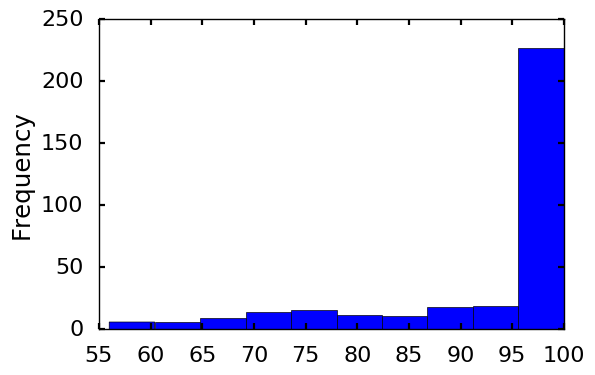

In [261]:
pd.Series(cd_ranks).plot(kind='hist')

In [ ]:
for i in range(ewg_prd_df.shape[0]):
    row = ewg_prd_df.iloc[i]
    for ing in row['New_List']:
        try:
            acne_score = float(ewg_ing_df[ewg_ing_df['ingredient_name']==ing]['Acne_Score'])
            print(ing, acne_score)
        except:
            print(row['New_List'] , 'No Ingredients')

In [122]:
import pickle

pickle_out = open("comodegenic_matches.pickle","wb")
pickle.dump(matches, pickle_out)
pickle_out.close()

print(matches[0])
print(pickle.load(open("comodegenic_matches.pickle","rb"))[0])

['Essence of Wellbeing Rosemary & Lavender Shampoo (2007 formulation)', 0.0011141193939666165]
['Essence of Wellbeing Rosemary & Lavender Shampoo (2007 formulation)', 0.0011141193939666165]


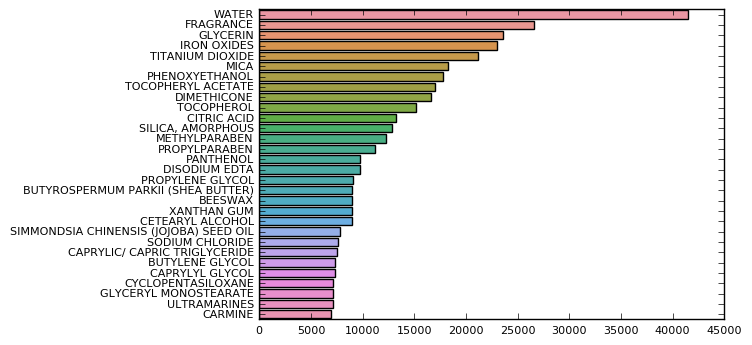

In [17]:
import seaborn as sns
x_cu = [cu for cu, frq in ing_cnts.most_common(30)]
y_frq = [frq for cu, frq in ing_cnts.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [18]:
type_mapping_df = pd.read_csv("Product Type Mapping.csv")
type_mapping = {}
for i in range(type_mapping_df.shape[0]):
    row = type_mapping_df.iloc[i]
    type_mapping[row['Detail']] = row['Type']


In [19]:
types = Counter()

for i in range(ewg_prd_df.shape[0]):
    fxl = ewg_prd_df.iloc[i]['product_type']
    if type(fxl) != float:
        for fx in fxl.split(','):
            types[type_mapping[fx]] +=1
    else:
        types['NA'] += 1
        

print(types.most_common(5))

[('Face Cream', 8835), ('Eye Makeup', 6112), ('Face Makeup', 6019), ('Body Sunscreen', 5755), ('Lips Makeup', 5133)]


In [20]:
for typ, amt in types.most_common():
    print(typ)

Face Cream
Eye Makeup
Face Makeup
Body Sunscreen
Lips Makeup
Face Cleanser
Hair Cleanser
Face Sunscreen
Body Cleanser
Nail Polish
Hair Condition
Hair Style
Body Fragrance
Face Acne
Lips Medicine
Body Cream
Body Oil
Hair Color
Body Deodorant
Hand Cleanser
Oral Cleanser
Body Bath
Eye Cream
Lips Sunscreen
Face Color
Hand Cream
Hair Medicine
Body Color
Brow Makeup
Face Shaving
Nail Medicine
Body Medicine
Oral Color
Feet Cream
Face Fragrance
Body Hair Remover
Eye Cleanser
Lips Plumper
Nail Cleanser
Feet Cleanser
Body Makeup
Face Medicine
Feet Deodorant
Eye Glue
Oral Deodorant
Nail Glue
Feet Medicine
Hair OIl
HAir Medicine


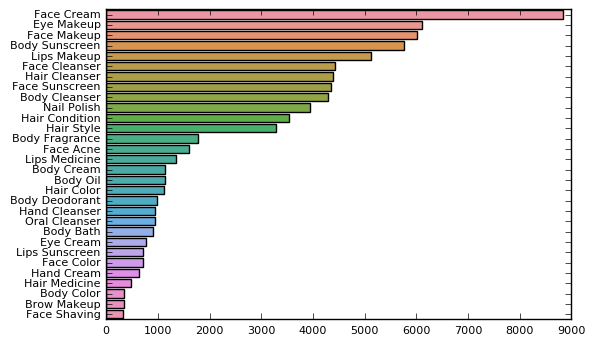

In [21]:
x_cu = [cu for cu, frq in types.most_common(30)]
y_frq = [frq for cu, frq in types.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [22]:
functions = Counter()
for i in range(ewg_ing_df.shape[0]):
    fxl = ewg_ing_df.iloc[i]['function_list']
    if type(fxl) != float:
        for fx in fxl:
            functions[fx.strip().lower()] +=1
    else:
        functions['NA'] += 1
        
print(functions.most_common(5))

[('NA', 2851), ('skin conditioning', 2333), ('skin-conditioning agent - miscellaneous', 1243), ('fragrance ingredient', 702), ('not reported', 700)]


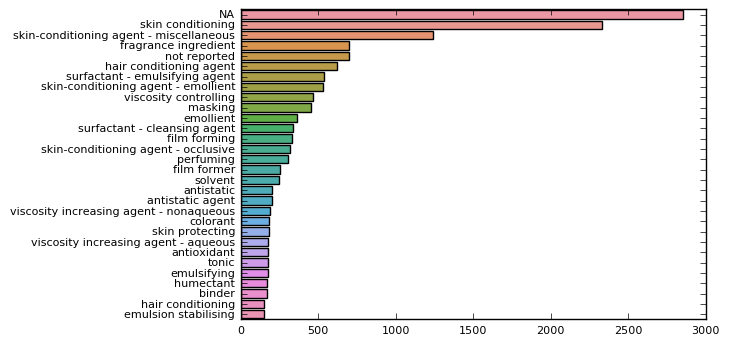

In [23]:
x_cu = [cu for cu, frq in functions.most_common(30)]
y_frq = [frq for cu, frq in functions.most_common(30)]
fbar = sns.barplot(y = x_cu, x = y_frq)
# xlabels
for item in fbar.get_yticklabels():
    item.set_size(8)
for item in fbar.get_xticklabels():
    item.set_size(8)

In [24]:
import tdidf

from tdidf import TfIdf

table = TfIdf()
for i in range(n):
    row = ewg_prd_df.iloc[i]
    table.add_document(row['product_name'],row['New_List'])
    #print(row['product_name'],row['New_List'])
#table.add_document("foo", ["alpha", "bravo", "charlie", "delta", "echo", "foxtrot", "golf", "hotel"])


In [126]:
matches = table.similarities(ewg_prd_df.iloc[101]['New_List'])
print(type(matches))
s_match = sorted(matches, key=lambda tup: tup[1], reverse = True)
#bad_ingredients({custid:'AShton', negingredients:['FORMALDEHYDE']})
print(s_match[0:10])
print(ewg_prd_df.iloc[101])

<class 'list'>
[['CVS Intense Body Wash Sport Scent', 0.002193692563182461], ['Old Spice High Endurance Body Wash Pure Sport', 0.0018199219546803157], ['Old Spice High Endurance Body Wash, Pure Sport', 0.0016470475243801428], ['Pantene Pro-V Expert Collection KeraGloss Oil Mist (2014 formulation)', 0.0009660683114780917], ['Terax Hair Care Crema Ultra Moisturizing Daily Conditioner (old formulation)', 0.0009131433848938428], ['Terax Hair Care Crema & Keratin Conditioner (old formulation)', 0.0009131433848938428], ['Irish Spring Body Wash, Aloe (old formulation)', 0.0009120779827582951], ['Irish Spring Body Wash, Aloe', 0.0009120779827582951], ['ATTITUDE Eco-Kids Shampoo 2 in 1 (old formulation)', 0.0008920123642832165], ['CVS Hair & Body Wash Extreme Energy (old formulation)', 0.0008707815609388866]]
allergy_imm_tox_score                                                136.8
cancer_score                                                          28.5
data_availability                     

In [100]:
print(ewg_prd_df.iloc[0])

allergy_imm_tox_score                                              39.2667
cancer_score                                                             0
data_availability                                                     Fair
dev_reprod_tox_score                                                     0
ingredient_list          [L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTIwL0NPQ0FNS...
overall_hazard_score                                                    38
product_id               L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2...
product_name             Essence of Wellbeing Rosemary & Lavender Shamp...
product_score                                                            2
product_type                                                       Shampoo
url                      http://www.ewg.org/skindeep/product/107559/Ess...
use_restrict_score                                                 88.6667
New_List                 [COCAMIDOPROPYL BETAINE, CITRUS GRANDIS (GRAPE...
Type                     

In [26]:
sentences = list()
# one hot ingredients


for i_list in ewg_prd_df['New_List']:
    if len(i_list) < 2:
        continue
    else:
        #print(type(i_list))
        sentences.append(i_list)
len(sentences)

#print(sentences[2], len(sentences[2]))

71768

In [27]:
%reload_ext gensim.models.word2vec
# we could use also tensor flow, there are multiple implementations of word2vec
from gensim.models import word2vec

# Modelling Helpers, see above the# Set values for NN parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 2    # 50% of the corpus                    
num_workers = 1       # Number of CPUs
context = 60          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(sentences)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

C:\Users\achevall\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [28]:
model.most_similar('D&C VIOLET 2')

[('CI 60725', 0.8559770584106445),
 ('D&C RED 34 CALCIUM LAKE', 0.8474440574645996),
 ('TRIPHENYL PHOSPHATE', 0.8412957191467285),
 ('BENZOPHENONE-1', 0.8145505785942078),
 ('DI-HEMA TRIMETHYLHEXYL DICARBAMATE', 0.8108563423156738),
 ('TOSYLAMIDE', 0.8068888187408447),
 ('PPG-2 DIMETHICONE', 0.8059697151184082),
 ('PEG-9 DIMETHACRYLATE', 0.7993033528327942),
 ('TOLUENE', 0.789995551109314),
 ('CI 45370', 0.7899836301803589)]

In [93]:
print(ewg_prd_df.iloc[0]['Type'])

In [30]:
ingredient_to_type = collections.Counter()
for i in range(n):
    ings = ewg_prd_df.iloc[i]['New_List']
    typs = ewg_prd_df.iloc[i]['product_type']
    for ing in ings:
        if type(typs) != float:
            for typ in typs.split(','):
                ingredient_to_type[(ing,type_mapping[typ])] += 1

In [31]:

rows = []
for keys in ingredient_to_type.keys():
    rows.append([keys[0], keys[1], ingredient_to_type[keys]])



In [32]:
ing_df = pd.DataFrame(rows)
def get_popular(name):
    try:
        x = ing_df[ing_df[0]==name].sort_values(2,ascending=False)
        return(x.iloc[0,1])
    except:
        return('Other')
get_popular('TITANIUM DIOXIDE')

'Eye Makeup'

In [33]:
print(ing_df.sort_values([0,2],ascending=False))

                                         0               1   2
55799                         p-MENTHANONE   Face Cleanser   4
50031                         p-MENTHANONE      Face Cream   3
30203   nardostachys jatamansi (SPIKENARD)      Face Cream   7
4230    nardostachys jatamansi (SPIKENARD)   Face Cleanser   2
23445   nardostachys jatamansi (SPIKENARD)      Hair Style   1
38872                  gamma-VALEROLACTONE  Face Sunscreen   1
34147                      gamma-TERPINENE   Hand Cleanser   1
46955                    gamma-OCTALACTONE  Body Sunscreen  20
5540                     gamma-OCTALACTONE   Hair Cleanser   3
15195                    gamma-OCTALACTONE     Lips Makeup   3
32716                    gamma-OCTALACTONE   Hand Cleanser   3
14703                    gamma-OCTALACTONE   Body Cleanser   2
7218                     gamma-OCTALACTONE  Hair Condition   1
26887                    gamma-OCTALACTONE  Face Sunscreen   1
60215                    gamma-OCTALACTONE      Face Cr

In [34]:
corpus = model.wv.vocab.keys() #not sure the exact api
emb_tuple = tuple([model[v] for v in corpus if type(v) == str])
X = np.vstack(emb_tuple)


In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 50)
X_tsne = tsne.fit_transform(X)

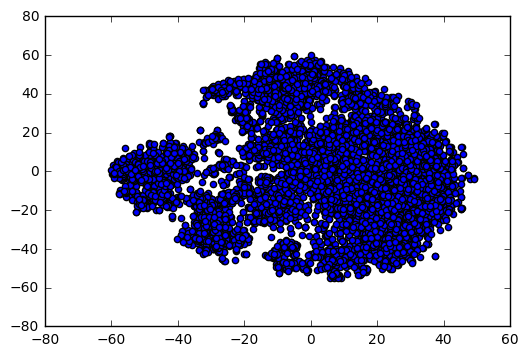

In [36]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])



In [131]:
typ_list = Counter(types).most_common(11)
track_2color = {typ_list[0][0]:"#55ff33", # blak
                typ_list[1][0]:"#FFFF00", #yellow
                typ_list[2][0]:"#1CE6FF", #cyan
                typ_list[3][0]: "#FF34FF", #pink 
                typ_list[4][0]:"#FF4A46", #red
                typ_list[5][0]:"#FFC300",  # green forest
                typ_list[6][0]:"#006FA6", # blue ocean
                typ_list[7][0]:"#A30059",# purple
                typ_list[8][0]:"#FFDBE5",  #light pink
                typ_list[9][0]: "#7A4900",  # gold or brown 
                #Add more later
                typ_list[10][0]:"#FDFFFF", # White 
                'Other': '#FFFFFF'
               }

color_vector = list()

i = 0
for v in corpus:
    typ = get_popular(v)
    try:
        color_vector.append(track_2color[typ])
    except:
        color_vector.append('#FFFFFF')

In [132]:
# ensemble the legend
lgend = list()
for l, c in track_2color.items():
    lgend.append(mpatches.Patch(color=c, label=l))

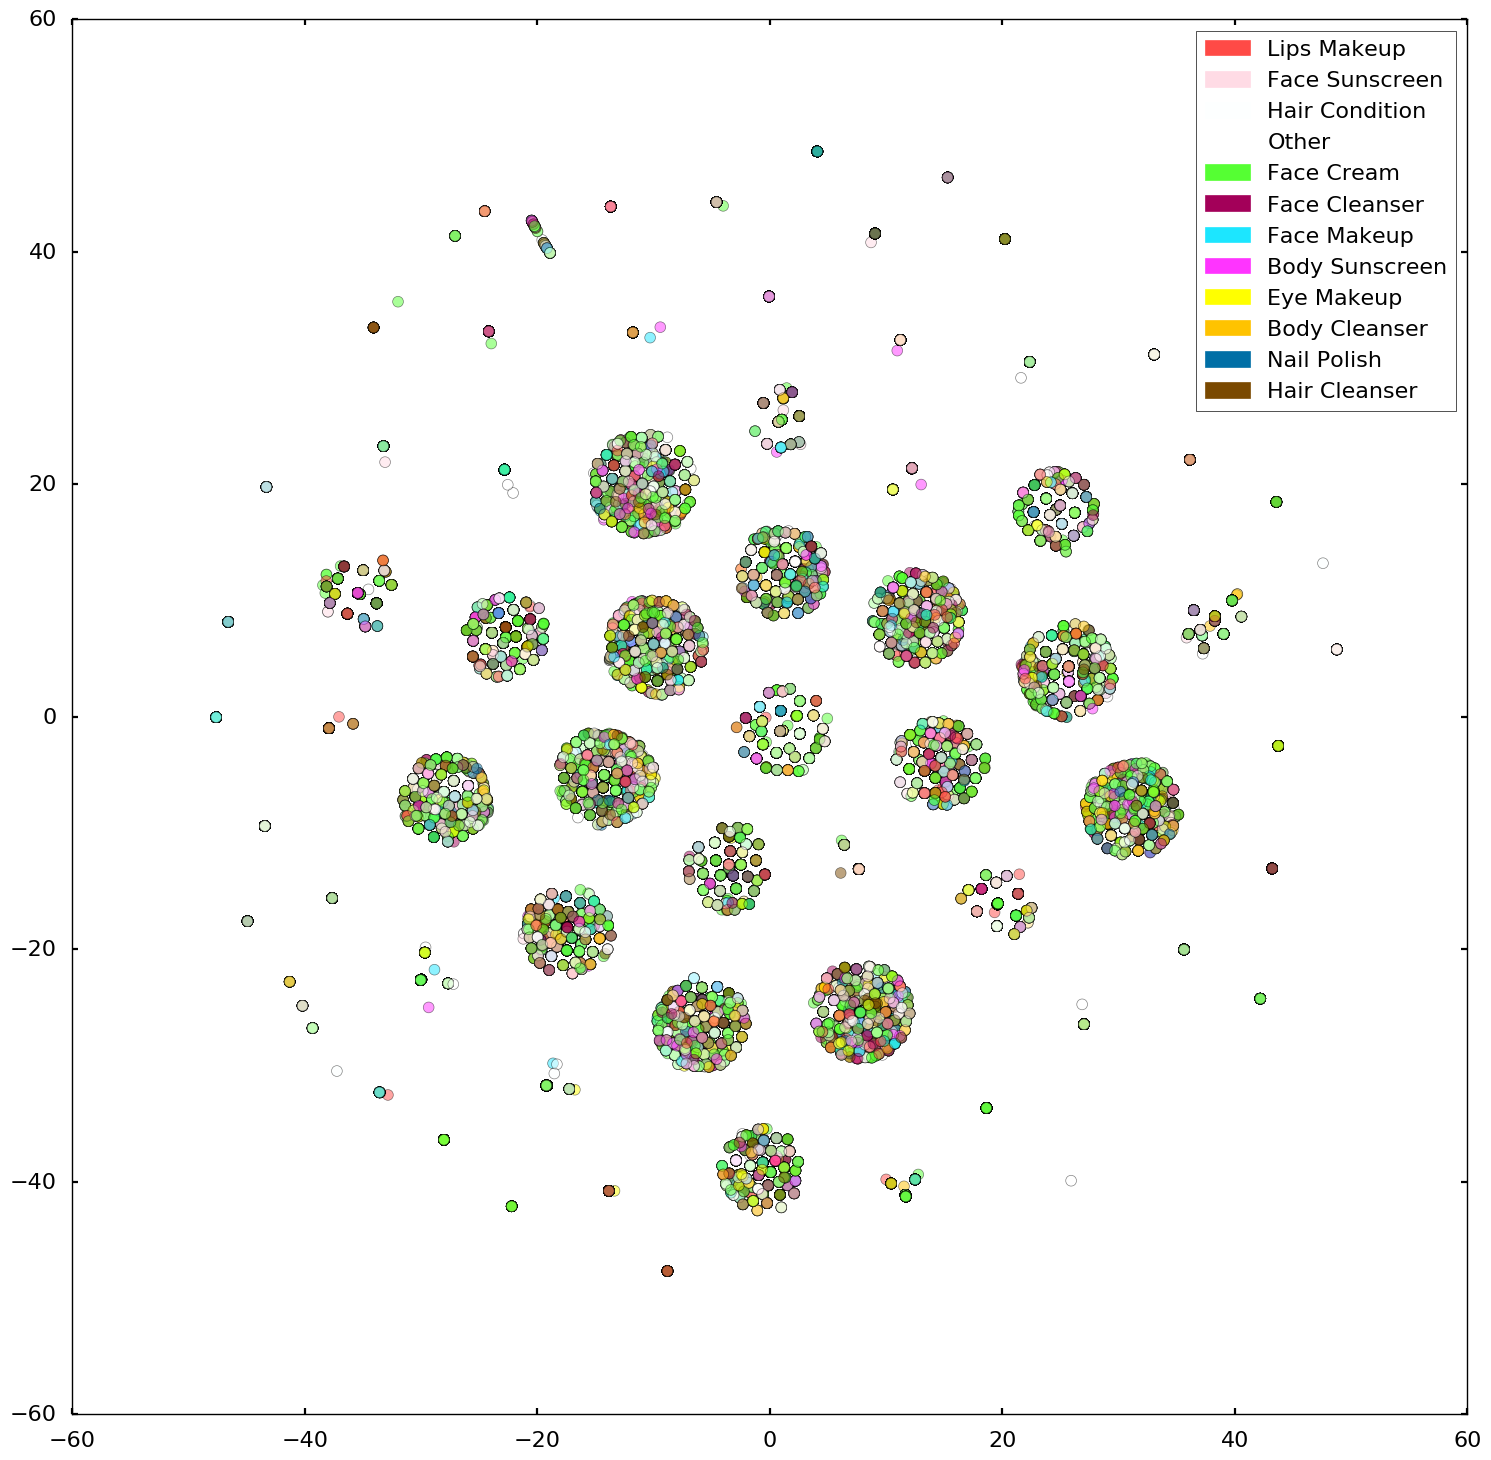

In [133]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector, alpha=.5, s=60)
#plt.xlim([-40,40])
#plt.ylim([-40,40])
plt.legend(handles=lgend)

In [42]:
import numpy as np
from scipy.sparse import dok_matrix
n = ewg_prd_df.shape[0]
X = np.zeros((n,len(ing_cnts.keys())))
prod_df = pd.DataFrame(X,columns = ing_cnts.keys())
#prod_df = dok_matrix(X)

for i in range(n):
    temp_ing = ewg_prd_df.iloc[i]['New_List']
    for col_name in range(len(temp_ing)):
        prod_df.loc[i][col_name] += 1
       

In [103]:
body_parts = ['Face','Eye','Body']
functions = ['Acne','Bath','Cleanser','Color','Cream','Makeup','Medicine','Oil','Shaving','Sunscreen']
acne_types = []
for body in body_parts:
    for fx in functions:
        acne_types.append(body + ' ' + fx)
print(acne_types)

['Face Acne', 'Face Bath', 'Face Cleanser', 'Face Color', 'Face Cream', 'Face Makeup', 'Face Medicine', 'Face Oil', 'Face Shaving', 'Face Sunscreen', 'Eye Acne', 'Eye Bath', 'Eye Cleanser', 'Eye Color', 'Eye Cream', 'Eye Makeup', 'Eye Medicine', 'Eye Oil', 'Eye Shaving', 'Eye Sunscreen', 'Body Acne', 'Body Bath', 'Body Cleanser', 'Body Color', 'Body Cream', 'Body Makeup', 'Body Medicine', 'Body Oil', 'Body Shaving', 'Body Sunscreen']


In [ ]:
acne_df = ewg_prd_df

In [ ]:
acne_subset = []

In [44]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=50)
X_pca = X_pca.fit_transform(prod_df)

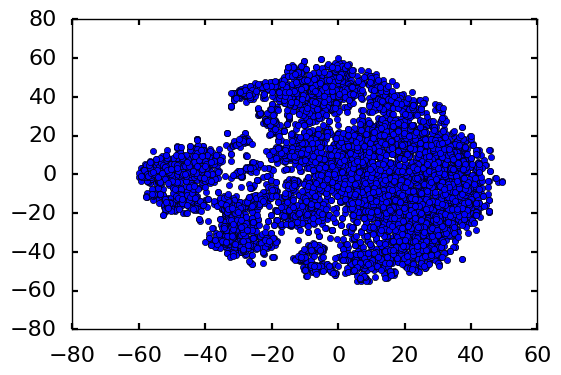

In [45]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])


In [46]:
# Modelling Helpers, see above the description
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_pca)


In [130]:
typ_list = types.most_common(11)
track_2color = {typ_list[0][0]:"#55ff33", # blak
                typ_list[1][0]:"#FFFF00", #yellow
                typ_list[2][0]:"#1CE6FF", #cyan
                typ_list[3][0]: "#FF34FF", #pink 
                typ_list[4][0]:"#FF4A46", #red
                typ_list[5][0]:"#FFC300",  # green forest
                typ_list[6][0]:"#006FA6", # blue ocean
                typ_list[7][0]:"#A30059",# purple
                typ_list[8][0]:"#FFDBE5",  #light pink
                typ_list[9][0]: "#7A4900",  # gold or brown 
                #Add more later
                typ_list[10][0]:"#FDFFFF", # White 
                'Other': '#FFFFFF'
               }

color_vector = list()

i = 0
for v in ewg_prd_df['Type']:
    #typ = get_popular(v)
    try:
        color_vector.append(track_2color[v])
    except:
        color_vector.append('#FFFFFF')

AttributeError: 'list' object has no attribute 'most_common'

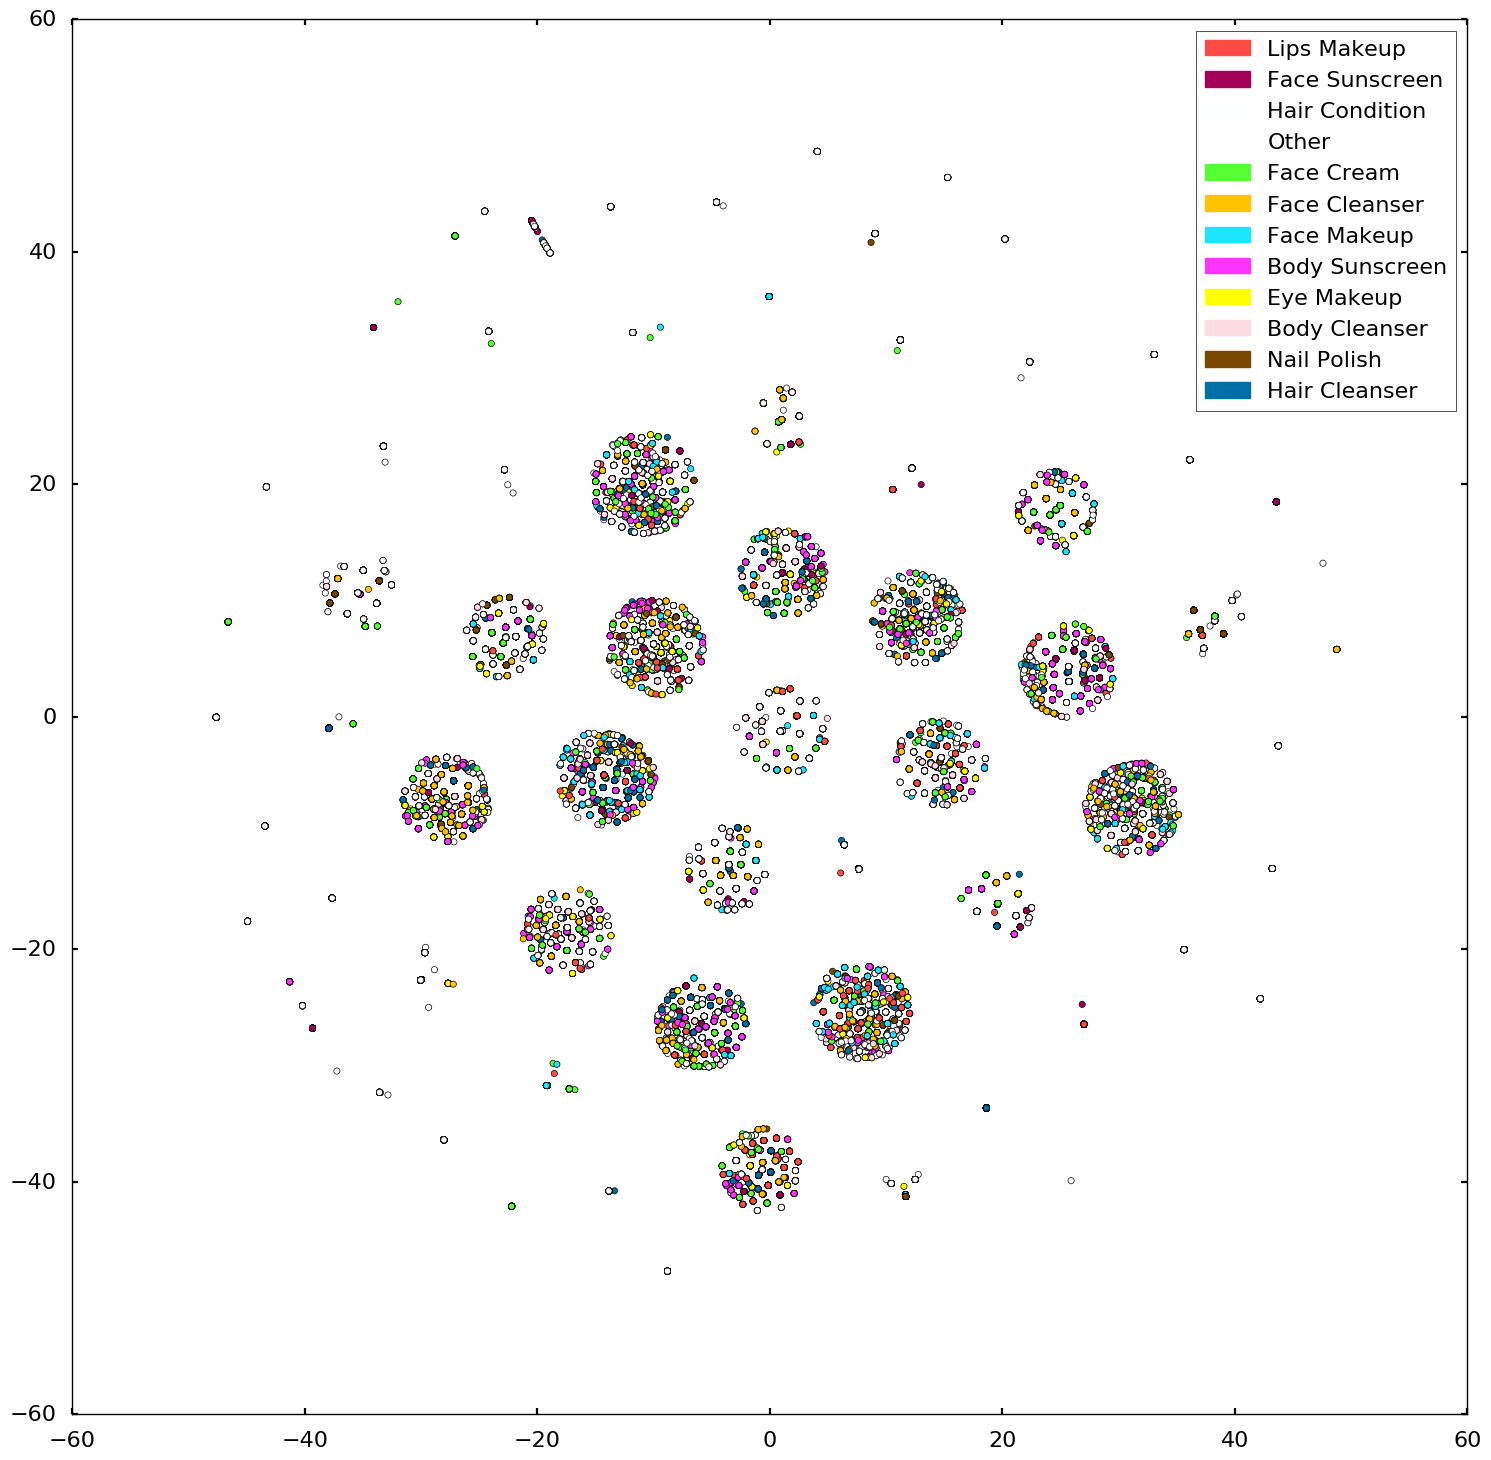

In [86]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector)
plt.legend(handles=lgend)

In [65]:
types = Counter()
ewg_prd_df['Type'] = ''
for i in range(ewg_prd_df.shape[0]):
    fxl = ewg_prd_df.iloc[i]['product_type']
    if type(fxl) != float:
        split_types = fxl.split(',')
        #ewg_prd_df.loc[i,'Type'] = type_mapping[split_types[0]]
        for fx in split_types:
            
            types[type_mapping[fx]] += 1
            if(len(fxl.split(',')) > 1):
                #print(fxl,'|',type_mapping[fx])
    else:
        types['NA'] += 1

C:\Users\achevall\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Acne Treatment, Anti-aging, Facial Cleanser | Face Acne
Acne Treatment, Anti-aging, Facial Cleanser | Face Cream
Acne Treatment, Anti-aging, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Around-eye Cream, Other Eye Makeup | Eye Cream
Around-eye Cream, Other Eye Makeup | Eye Makeup
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
After Sun Product, Anti-itch/rash Cream, Diaper Cream | Body Sunscreen
After Sun Product, Anti-itch/rash Cream, Diaper Cream | Body Medicine
After Sun Product,

Anti-aging, Body Oil, Facial Moisturizer/treatment | Face Cream
Anti-aging, Body Oil, Facial Moisturizer/treatment | Body Oil
Anti-aging, Body Oil, Facial Moisturizer/treatment | Face Cream
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Anti-aging, Foundation, Sunscreen: Makeup | Face Cream
Anti-aging, Foundation, Sunscreen: Makeup | Face Makeup
Anti-aging, Foundation, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Hand Cream | Face Cream
Anti-aging, Hand Cream | Hand Cream
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Facial Moisturizer/treatment, Foundation | Face Cream
Facial Moisturizer/treatment, Foundation | Face Makeup
Anti-aging, Foundation, Sunscreen: Makeup | Face Cream
Anti-aging, Foundation, Sunscreen: Makeup | Face Makeup
Anti-aging, Foundation, Sunscree

Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Body Spray, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Men | Body Fragrance
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Antiperspirant/deodorant, Body Spray | Body Deodorant
Antiperspirant/deodorant, Body Spray | Body Fragrance
Antiperspirant/deodorant, Fragrance For Women | Body Deodorant
Antiperspirant/deodorant, Fragrance For Women | Body Fragrance
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Facial Cleanser, Makeup Remover | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Acne Treatment, M

Fragrance For Men, Fragrance For Women | Body Fragrance
Fragrance For Men, Fragrance For Women | Body Fragrance
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Blush, Bronzer/highlighter | Face Makeup
Blush, Bronzer/highlighter | Body Color
Facial Powder, Oil Controller | Face Makeup
Facial Powder, Oil Controller | Face Acne
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Facial Moisturizer/treatment, Sunscreen: Moisturizer | Face Cream
Facial Moisturizer/treatment, Sunscreen: Moisturizer | Face Sunscreen
Exfoliant/scrub, Moisturizer | Face Cleanser
Exfoliant/scrub, Moisturizer | Body Cream
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Anti-itch/rash Cream, Diaper Cream | Body Medicine
Anti-itch/rash Cream, Diaper Cream | B

Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Anti-aging, Exfoliant/scrub | Face Cream
Anti-aging, Exfoliant/scrub | Face Cleanser
Facial Cleanser, Toners/astringents | Face Cleanser
Facial Cleanser, Toners/astringents | Face Acne
Body Oil, Shaving Cream (men's) | Body Oil
Body Oil, Shaving Cream (men's) | Face Shaving
Cuticle Treatment, Nail Treatment | Nail Medicine
Cuticle Treatment, Nail Treatment | Nail Medicine
Conditioner, Styling Gel/lotion | Hair Condition
Conditioner, Styling Gel/lotion | Hair Style
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Eye Makeup Remover, Facial Cleanser, Makeup Remover | Eye Cleanser
Eye Makeup Remover, Facial Cleanser, Makeup Remover | Face Cleanser
Eye Makeup Remover, Facial Cleanser, Makeup Remover | Face Cleanser
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, S

Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Styling Gel/lotion | Hair Condition
Conditioner, Styling Gel/lotion | Hair Style
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Crea

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Blush, Bronzer/highlighter | Face Makeup
Blush, Bronzer/highlighter | Body Color
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Concealer, Sunscreen: Makeup | Face Makeup
Concealer, Sunscreen: Makeup | Face Sunscreen
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Body Oil, Skin Fading/lightener | Body Oil
Body Oil, Skin Fading/lightener | Body Color
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Bath
Antiperspirant/deodorant (men's), Body Spray | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray | Body Fragrance
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Ba

Shaving Cream, Shaving Cream (men's) | Face Shaving
Shaving Cream, Shaving Cream (men's) | Face Shaving
Shaving Cream, Shaving Cream (men's) | Face Shaving
Shaving Cream, Shaving Cream (men's) | Face Shaving
Fragrance For Men, Fragrance For Women | Body Fragrance
Fragrance For Men, Fragrance For Women | Body Fragrance
Body Oil, Muscle/joint Soreness | Body Oil
Body Oil, Muscle/joint Soreness | Body Medicine
Fragrance For Men, Fragrance For Women | Body Fragrance
Fragrance For Men, Fragrance For Women | Body Fragrance
Fragrance For Men, Fragrance For Women | Body Fragrance
Fragrance For Men, Fragrance For Women | Body Fragrance
Shaving Cream, Shaving Cream (men's) | Face Shaving
Shaving Cream, Shaving Cream (men's) | Face Shaving
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Detangler | Hair Condition
Condi

Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Moisturizer, Sunless Tanning | Face Cream
Moisturizer, Sunless Tanning | Body Color
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Anti-aging, Exfoliant/scrub, Facial Cleanser | Face Cream
Anti-aging, Exfoliant/scrub, Facial Cleanser | Face Cleanser
Anti-aging, Exfoliant/scrub, Facial Cleanser | Face Cleanser
Body Wash/cleanser, Bubble Bath, Shampoo | Body Cleanser
Body Wash/cleanser, Bubble Bath, Shampoo | Body Bath
Body Wash/cleanser, Bubble Bath, Shampoo | Hair Cleanser
Anti-aging, Fragrance For Women, Moisturizer | Face Cream
Anti-aging, Fragrance For Women, Moisturizer | Body Fragrance
Anti-aging, Fragrance For Women, Moisturizer | Body Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Bar Soap | Face Cream
An

Facial Powder, Foundation | Face Makeup
Facial Powder, Foundation | Face Makeup
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hai

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Concealer, Foundation, Sunscreen: Makeup | Face Makeup
Concealer, Foundation, Sunscreen: Makeup | Face Makeup
Concealer, Foundation, Sunscreen: Makeup | Face Sunscreen
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Facial Moisturizer/treatment, Skin Fading/lightener | Face Cream
Facial Moisturizer/treatment, Skin Fading/lightener | Body Color
Anti-aging, Around-eye Cream | Face Cream
Anti-a

Body Wash/cleanser, Facial Cleanser | Body Cleanser
Body Wash/cleanser, Facial Cleanser | Face Cleanser
Body Wash/cleanser, Facial Cleanser | Body Cleanser
Body Wash/cleanser, Facial Cleanser | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Exfoliant/scrub, Facial Moisturizer/treatment | Face Cleanser
Exfoliant/scrub, Facial Moisturizer/treatment | Face

Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Bath Oil/salts/soak, Body Oil | Body Bath
Bath Oil/salts/soak, Body Oil | Body Oil
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Mask | Face Cream
Anti-aging, Mask | Face Cleanser
Anti-aging, Conditioner | Face Cream
Anti-aging, Conditioner | Hair Condition
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Anti-aging, Foundation, Sunscreen: Makeup | Face Cream
Anti-aging, Fou

Acne Treatment, Moisturizer | Face Acne
Acne Treatment, Moisturizer | Body Cream
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Acne Treatment, Mask | Face Acne
Acne Treatment, Mask | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Acne Treatme

Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Mask | Face Cream
Anti-aging, Mask | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Antiperspirant/deodorant, Antiperspirant/deodorant (men's) | Body Deodorant
Antiperspirant/deodorant, Antiperspirant/deodorant (men's) | Body Deodorant
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-agin

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Bar Soap, Facial Cleanser | Body Cleanser
Bar Soap, Facial Cleanser | Face Cleanser
Lip Balm, Lip Gloss | Lips Medicine
Lip Balm, Lip Gloss | Lips Makeup
Lip Balm, Lip Gloss | Lips Medicine
Lip Balm, Lip Gloss | Lips Makeup
Body Oil, Moisturizer | Body Oil
Body Oil, Moisturizer | Body Cream
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Muscle/joint Soreness, Vapor Rubs | Body Medicine
Muscle/joint Soreness, Vapor Rubs | Body Medicine
Baby Oil, Cradle Cap Treatment | Body Oil
Baby Oil, Cradle Cap Treatment | HAir Medicine
Baby Shampoo, Baby So

Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Around-eye Cream, Lip Balm | Eye Cream
Around-eye Cream, Lip Balm | Lips Medicine
Acne Treatment, Mask | Face Acne
Acne Treatment, Mask | Face Cleanser
Anti-aging, Mask | Face Cream
Anti-aging, Mask | Face Cleanser
Acne Treatment, Toners/astringents | Face Acne
Acne Treatment, Toners/astringents | Face Acne
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Mask | Face Cream
Anti-aging, Mask | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Sunscreen: SPF Greater Than 30 | Face Cream
Anti-aging, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Body Firming Lotion, Facial Moisturizer/treatment | Body Cream
Body Firming Lotion, Fa

Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Concealer | Face Acne
Acne Treatment, Concealer | Face Makeup
Brow Liner, Mascara | Brow Makeup
Brow Liner, Mascara | Eye Makeup
Acne Treatment, Foundation | Face Acne
Acne Treatment, Foundation | Face Makeup
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Moisturizer, Sunless Tanning | Face Cream
Moisturizer, Sunless Tanning | Body Color
Facial Powder, Foundation | Face Makeup
Facial Powder, Foundation | Face Makeup
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Toners/astringents | Face Cream
Anti-aging, Toners/astringents | Face Acne
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, 

Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Body Art, Eye Shadow | Body Color
Body Art, Eye Shadow | Eye Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Body Art, Eye Shadow | Body Color
Body Art, Eye Shadow | Eye Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body Makeup
Eye Shadow, Glitter | Eye Makeup
Eye Shadow, Glitter | Body 

Body Oil, Moisturizer | Body Oil
Body Oil, Moisturizer | Body Cream
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Anti-aging, Body Wash/cleanser | Face Cream
Anti-aging, Body Wash/cleanser | Body Cleanser
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/tr

Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Body Oil, Vapor Rubs | Body Oil
Body Oil, Vapor Rubs | Body Medicine
Blush, Bronzer/highlighter | Face Makeup
Blush, Bronzer/highlighter | Body Color
Anti-itch/rash Cream, Foot Odor Control | Body Medicine
Anti-itch/rash Cream, Foot Odor Control | Feet Deodorant
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Moisturizer, Redness/rosacea Treatment | Face Cream
Moisturizer, Redness/rosacea Treatment | Face Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Fac

Anti-aging, Foundation | Face Cream
Anti-aging, Foundation | Face Makeup
Mask, Skin Fading/lightener | Face Cleanser
Mask, Skin Fading/lightener | Body Color
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Antiperspirant/deodorant (men's), Body Spray, Fragrance For Men | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray, Fragrance For Men | Body Fragrance
Antiperspirant/deodorant (men's), Body Spray, Fragrance For Men | Body Fragrance
Concealer, Foundation | Face Makeup
Concealer, Foundation | Face Makeup
Concealer, Foundation | Face Makeup
Concealer, Foundation | Face Makeup
Concealer, Foundation | Face Makeup
Concealer, Foundation | Face Makeup
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Fa

Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Conditioner, Dandruff/scalp Treatment, Hair-loss Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment, Hair-loss Treatment | Hair Medicine
Conditioner, Dandruff/scalp Treatment, Hair-loss Treatment | Hair Medicine
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Facial Moisturizer/treatment, Lip Balm | Face Cream
Facial Mois

Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Bronzer/highlighter, Eye Shadow | Face Color
Bronzer/highlighter, Eye Shadow | Eye Makeup
Bronzer/highlighter, Eye Shadow | Face Color
Bronzer/highlighter, Eye Shadow | Eye Makeup
Bronzer/highlighter, Foundation | Face Color
Bronzer/highlighter, Foundation | Face Makeup
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Concealer, Sunscreen: Makeup | Face Makeup
Concealer, Sunscreen: Makeup | Face Sunscreen
Facial Powder, Makeup Primer | Face Makeup
Facial Powder, Makeup Primer | Face Makeup
Facial Powder, Makeup Primer | Face Makeup
Facial Powder, Makeup Primer | Face Makeup
Facial Powder, Foundation | Face Makeup
Facial Powder, Foundation | Face Makeup
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
E

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Brow Liner, Eye Shadow | Brow Makeup
Brow Liner, Eye Shadow | Eye Makeup
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Facial Powder, Foundation | Face Makeup
Facial Powder, Foundation | Face Makeup
Acne Treatment, Mask | Face Acne
Acne Treatment, Mask | Face Cleanser
Hair Relaxer, Hair Spray | Hair Style
Hair Relaxer, Hair Spray | Hair Style
Nail Polish, Nail Treatment | Nail Polish
Nail Polish, Nail Treatment | Nail Medicine
Anti-aging, Lip Plumper | Face Cream
Anti-aging, Lip Plumper | Lips Plumper
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Baby Shampoo, Baby 

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Exfoliant/scrub, Lip Balm | Face Cleanser
Exfoliant/scrub, Lip Balm | Lips Medicine
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Dandruff/scalp Treat

Hand Cream, Nail Treatment | Hand Cream
Hand Cream, Nail Treatment | Nail Medicine
Exfoliant/scrub, Foot Cleansing | Face Cleanser
Exfoliant/scrub, Foot Cleansing | Feet Cleanser
Anti-aging, Lip Balm | Face Cream
Anti-aging, Lip Balm | Lips Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Around-eye Cream, Facial Moisturizer/treatment | Eye Cream
Around-eye Cream, Facial Moisturizer/treatment | Face Cream
Around-eye Cream, Lip Balm | Eye Cream
Around-eye Cream, Lip Balm | Lips Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-ag

Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscr

Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Acne Treatment, Mask | Face Acne
Acne Treatment, Mask | Face Cleanser
Eye Makeup Remover, Makeup Remover | Eye Cleanser
Eye Makeup Remover, Makeup Remover | Face Cleanser
Facial Moisturizer/treatment, Hand Cream, Moisturizer | Face Cream
Facial Moisturizer/treatment, Hand Cream, Moisturizer | Hand Cream
Facial Moisturizer

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Exfoliant/scrub | Face Cream
Anti-aging, Exfoliant/scrub | Face Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/tr

Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-itch/rash Cream, Redness/rosacea Treatment | Body Medicine
Anti-itch/rash Cream, Redness/rosacea Treatment | Face Medicine
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Acne Treatment, Moisturizer | Face Acne
Acne Treatment, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | 

Body Firming Lotion, Sunless Tanning | Body Cream
Body Firming Lotion, Sunless Tanning | Body Color
Facial Cleanser, Makeup Remover | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Baby Toothpaste, Toothpaste | Oral Cleanser
Baby Toothpaste, Toothpaste | Oral Cleanser
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Around-eye Cream, Concealer | Eye Cream
Around-eye Cream, Concealer | Face Makeup
Lip Gloss, Lipstick | Lips Makeup
Lip Gloss, Lipstick | Lips Makeup
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Hand Cream, Nail Treatment | Hand Cream
Hand Cream, Nail Treatment | Nail Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Antiperspirant/deodorant, Antiperspirant/deodorant (men's) | Body Deodorant
Anti

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Acne Treatment, Body Wash/cleanser | Face Acne
Acne Treatment, Body Wash/cleanser | Body Cleanser
Hair-loss Treatment, Shampoo | Hair Medicine
Hair-loss Treatment, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Bod

CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Bar Soap, Exfoliant/scrub | Body Cleanser
Bar Soap, Exfoliant/scrub | Face Cleanser
Hair Color And Bleaching, Hair Relaxer | Hair Color
Hair Color And Bleaching, Hair Relaxer | Hair Style
Hair Color And Bleaching, Hair Relaxer | Hair Color
Hair Color And Bleaching, Hair Relaxer | Hair Style
Hair Color And Bleaching, Hair Relaxer | Hair Co

Anti-aging, Exfoliant/scrub | Face Cream
Anti-aging, Exfoliant/scrub | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Facial Moisturizer/treatment, Redness/rosacea Treatment | Face Cream
Facial Moisturizer/treatment, Redness/rosacea Treatment | Face Medicine
Body Wash/cleanser, Bubble Bath, Shampoo | Body Cleanser
Body Wash/cleanser, Bubble Bath, Shampoo | Body Bath
Body Wash/cleanser, Bubble Bath, Shampoo | Hair Cleanser
Body Wash/cleanser, Bubble Bath, Shampoo | Body Cleanser
Body Wash/cleanser, Bubble Bath, Shampoo | Body Bath
Body Wash/cleanser, Bubble Bath, Shampoo | Hair Cleanser
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facia

Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Condition
Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Medicine
Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Hand Cream, Nail Treatment | Hand Cream
Hand Cream, Nail Treatment | Nail Medicine
Hand Cream, Nail Treatment | Hand Cream
Hand Cream, Nail Treatment | Nail Medicine
Hand Cream, Nail Treatment | Hand Cream
Hand Cream, Nail Treatment | Nail Medicine
Lip Gloss, Nail Polish | Lips Makeup
Lip Gloss, Nail Polish | Nail Polish
Bath Oil/salts/soak, Body Wash/cleanser | Body Bath
Bath Oil/salts/soak, Body Wash/cleanser | Body Cleanser
Bath Oil/salts/soak, Body Wash/cleanser | Body Bath
Bath Oil/salts/soak, Body Wash/cleanser | Body Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
An

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Lip Gloss, Lip Plumper | Lips Makeup
Lip Gloss, Lip Plumper | Lips Plumper
Acne Treatment, Toners/astringents | Face Acne
Acne Treatment, Toners/astringents | Face Acne
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Mascara, Other Eye Makeup | Eye Makeup
Mascara, Other Eye Makeup | Eye Makeup
Bronzer/highlighter, Foundation | Face Color
Bronzer/highlighter, Foundation | Face Makeup
Eye Liner, Eye Shadow | Eye Makeup
Eye Liner, Eye Shadow | Eye Makeup
Lip Balm, Lipstick | Lips Medicine
Lip Balm, Lipstick | Lips Makeup
Lip Balm, Lipstick | Lips Medicine
Lip Balm, Lipstick | Lips Makeup
Lip Balm, Lipstick | Lips Medicine
Lip Balm, Lipstick | Lips 

Foot Moisturizer, Hand Cream | Feet Cream
Foot Moisturizer, Hand Cream | Hand Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Hair Color And Bleaching, Hair-loss Treatment | Hair Color
Hair Color And Bleaching, Hair-loss Treatment | Hair Medicine
Hair-loss Treatment, Shampoo | Hair Medicine
Hair-loss Treatment, Shampoo | Hair Cleanser
Around-eye Cream, Skin Fading/lightener | Eye Cream
Around-eye Cream, Skin Fading/lightener | Body Color
Blush, Lip Balm | Face Makeup
Blush, Lip Balm | Lips Medicine
Blush, Lip Balm | Face Makeup
Blush, Lip Balm | Lips Medicine
Blush, Lip Balm | Face Makeup
Blush, Lip Balm | Lips Medicine
After Shave, Toners/astringents | Face Fragrance
After Shave, Toners/astringents | Face Acne
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Foundation

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Bath
Antiperspirant/deodorant (men's), Body Spray | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray | Body Fragrance
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Conditioner, Detangler | Hair Condition
Conditioner, Detangler | Hair Cleanser
Blush, Eye Shadow | Face Makeup
Blush, Eye Shadow | Eye Makeup
Foot Moisturizer, Hand Cream | Feet Cream
Foot Moisturizer, Hand Cream | Hand Cream
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Antiperspirant/deodorant (men's), Body Spray | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray | Body Fragrance
B

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Baby Shampoo, Shampoo | Hair Cleanser
Baby Shampoo, Shampoo | Hair Cleanser
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
Conditioner, Hair Color And Bleaching | Hair Condition
Conditioner, Hair Color And Bleaching | Hair Color
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Antiperspirant/deodorant (men's), Body Spray | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray | Body Fragrance
Makeup Primer, Mascara | Face Makeup
Makeup Primer, Mascara | Eye Makeup
Antiperspirant/deodorant (men's), Body Spray | Body Deodorant
Antiperspirant/deodorant (men's), Body Spray | Body Fragrance
Dandruff/scalp Treatment, Shampoo

Lip Gloss, Lipstick | Lips Makeup
Lip Gloss, Lipstick | Lips Makeup
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Moisturizer, Styling Gel/lotion | Face Cream
Moisturizer, Styling Gel/lotion | Hair Style
Body Wash/cleanser, Conditioner, Shampoo | Body Cleanser
Body Wash/cleanser, Conditioner, Shampoo | Hair Condition
Body Wash/cleanser, Conditioner, Shampoo | Hair Cleanser
Anti-aging, Foundation | Face Cream
Anti-aging, Foundation | Face Makeup
Concealer, Skin Fading/lightener | Face Makeup
Concealer, Skin Fading/lightener | Body Color
Anti-aging, Concealer | Face Cream
Anti-aging, Concealer | Face Makeup
Anti-aging, Foundation | Face Cream
Anti-aging, Foundation | Face Makeup
Anti-aging, Foundation | Face Cream
Anti-aging, Foundation | Face Makeup
Cuticle Treatment, Nail Treatment | Nail Medicine
Cuticle Treatment, Nail Treatment | Nail Medicine
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moistu

Eye Shadow, Makeup Primer | Eye Makeup
Eye Shadow, Makeup Primer | Face Makeup
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Exfoliant/scrub, Facial Moisturizer/treatment | Face Cleanser
Exfoliant/scrub, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Acne Treatment, Bar Soap | Face Acne
Acne Treatment, Bar Soap | Body Cleanser
Anti-aging, Hand Cream | Face Cream
Anti-aging, Hand Cream | Hand Cream
Anti-aging, Toners/astringents | Face Cream
Anti-aging, Toners/astringents | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Acne Treatment, Foundation | Face Acne
Acne Trea

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Facial Moisturizer/treatment, Hand Cream | Face Cream
Facial Moisturizer/treatment, Hand Cream | Hand Cream
Facial Moisturizer/treatment, Hand Cream | Face Cream
Facial Moisturizer/treatment, Hand Cream | Hand Cream
Facial Moisturizer/treatment, Hand Cream | Face Cream
Facial Moisturizer/treatment, Hand Cream | Hand Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/tr

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Exfoliant/scrub, Facial Moisturizer/treatment | Face Cleanser
Exfoliant/scrub, Facial Moisturizer/treatment | Face Cream
Detangler, Styling Gel/lotion | Hair Cleanser
Detangler, Styling Gel/lotion | Hair Style
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moistur

Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Acne Treatment, Sunscreen: Moisturizer | Face Acne
Acne Treatment, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Around-eye Cream, Sunscreen: Moisturizer | Eye Cream
Around-eye Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream

Cuticle Treatment, Nail Treatment | Nail Medicine
Cuticle Treatment, Nail Treatment | Nail Medicine
Acne Treatment, Mask | Face Acne
Acne Treatment, Mask | Face Cleanser
Mouthwash, Toothpaste | Oral Cleanser
Mouthwash, Toothpaste | Oral Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Baby Lotion, Diaper Cream | Body Cream
Baby Lotion, Diaper Cream | Body Cream
Acne Treatment, Toners/astringents | Face Acne
Acne Treatment, Toners/astringents | Face Acne
Baby Lotion, Diaper Cream | Body Cream
Baby Lotion, Diaper Cream | Body Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Con

Facial Powder, Sunscreen: Makeup | Face Makeup
Facial Powder, Sunscreen: Makeup | Face Sunscreen
Bronzer/highlighter, Sunscreen: Makeup | Face Color
Bronzer/highlighter, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Body Wash/cleanser, Shaving Cream (men's) | Body Cleanser
Body Wash/cleanser, Shaving Cream (men's) | Face Shaving
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Anti-aging, BB Cream | Face Cream
Anti-aging, BB Cream | Face Cream
Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Condition
Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Medicine
Conditioner, Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo |

Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Anti-aging, Sunscreen: SPF 15-30 | Face Cream
Anti-aging, Sunscreen: SPF 15-30 | Body Sunscreen
Anti-aging, Sunscreen: Moisturizer | Face Cream
Anti-aging, Sunscreen: Moisturizer | Face Sunscreen
Conditioner, Moisturizer | Hair Condition
Conditioner, Moisturizer | Body Cream
Conditioner, Moisturizer | Hair Condition
Conditioner, Moisturizer | Body Cream
Exfoliant/scrub, Mask | Face Cleanser
Exfoliant/scrub, Mask | Face Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Brow Liner, Eye Liner | Brow Makeup
Brow Liner, Eye Liner | Eye Makeup
After Shave, Facial Moisturizer/treatment | Face Fragrance
After Shave, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Sunscreen: Moisturizer | Face Cream
Anti-aging, Sunscreen: Moisturizer | Face Sunscreen
Body Was

Anti-aging, Moisturizer | Face Cream
Anti-aging, Moisturizer | Body Cream
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Facial Powder, Sunscreen: Makeup | Face Makeup
Facial Powder, Sunscreen: Makeup | Face Sunscreen
Anti-itch/rash Cream, Baby Lotion | Body Medicine
Anti-itch/rash Cream, Baby Lotion | Body Cream
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Concealer, Eye Liner, Lip Liner | Face Makeup
Concealer, Eye Liner, Lip Liner | Eye Makeup
Concealer, Eye Liner, Lip Liner | Lips Makeup
Facial Moisturizer/t

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Facial Powder, Sunscreen: Makeup | Face Makeup
Facial Powder, Sunscreen: Makeup | Face Sunscreen
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Facial Powder, Sunscreen: Makeup | Face Makeup
Facial Powder, Sunscreen: Makeup | Face Sunscreen
Foundation, Sunscreen: Makeup | Face Makeup
Foundation, Sunscreen: Makeup | Face Sunscreen
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cre

Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facial Cleanser | Face Cleanser
Anti-aging, Toners/astringents | Face Cream
Anti-aging, Toners/astringents | Face Acne
Anti-aging, 

After Shave, Fragrance For Men | Face Fragrance
After Shave, Fragrance For Men | Body Fragrance
After Shave, Fragrance For Men | Face Fragrance
After Shave, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Men | Body Fragrance
After Shave, Fragrance For Men | Face Fragrance
After Shave, Fragrance For Men | Body Fragrance
After Shave, Fragrance For Men | Face Fragrance
After Shave, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Men | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Body Fragrance
Body Spray, Fragrance For Women | Bo

Facial Cleanser, Liquid Hand Soap | Face Cleanser
Facial Cleanser, Liquid Hand Soap | Hand Cleanser
Conditioner, Detangler | Hair Condition
Conditioner, Detangler | Hair Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Hair Treatment/serum, Mask | Hair Medicine
Hair Treatment/serum, Mask | Face Cleanser
Acne Treatment, Facial Moisturizer/treatment | Face Acne
Acne Treatment, Facial Moisturizer/treatment | Face Cream
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Exfoliant/scrub, Facial Cleanser | Face Cleanser
Diaper Cream, Lip Balm | Body Cream
Diaper Cream, Lip Balm | Lips Medicine
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Body Oil, Moisturizer | Body Oil
Body Oil, Moisturize

Baby Lotion, Sunscreen: Moisturizer | Body Cream
Baby Lotion, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen:

Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Su

BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Around-eye Cream, Facial Moisturizer/treatment | Eye Cream
Around-eye Cream, Facial Moisturizer/treatment | Face Cream
Anti-aging, Around-eye Cream | Face Cream
Anti-aging, Around-eye Cream | Eye Cream
After Sun Product, Damaged Skin Treatment | Body Sunscreen
After Sun Product, Damaged Skin Treatment | Face Medicine
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Facial Cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Facial Cleanser, Shampoo | Face Cleanser
Body Wash/cleanser, Facial Cleanser, Shampoo | Hair Cleanser
Facial Moistur

After Sun Product, Moisturizer | Body Sunscreen
After Sun Product, Moisturizer | Body Cream
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
After Shave, Moisturizer | Face Fragrance
After Shave, Moisturizer | Body Cream
Conditioner, Facial Moisturizer/treatment | Hair Condition
Conditioner, Facial Moisturizer/treatment | Face Cream
Blush, Lip Gloss | Face Makeup
Blush, Lip Gloss | Lips Makeup
Blush, Lip Gloss | Face Makeup
Blush, Lip Gloss | Lips Makeup
Blush, Lipstick | Face Makeup
Blush, Lipstick | Lips Makeup
Blush, Lip Gloss | Face Makeup
Blush, Lip Gloss | Lips Makeup
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Blush, Bronzer/highlighter | Face Makeup
Blush, Bronzer/highlighter | Body Color
Blush, Bronzer/highlighter | Face Makeup
Blush, Bronzer/highlighter | Body Color
Anti-aging, Facial Cleanser | Face Cream
Anti-aging, Facia

Bath Oil/salts/soak, Muscle/joint Soreness | Body Bath
Bath Oil/salts/soak, Muscle/joint Soreness | Body Medicine
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Bath Oil/salts/soak, Body Oil | Body Bath
Bath Oil/salts/soak, Body Oil | Body Oil
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Bath
Bath Oil/salts/soak, Body Oil | Body Bath
Bath Oil/salts/soak, Body Oil | Body Oil
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Conditioner, Dandruff/scalp Treatment | Hair Condition
Conditioner, Dandruff/scalp Treatment | Hair Medicine
Body Oil, Hair Treatment/serum | Body Oil
Body Oil, Hair Treatment/serum | Hair Medicine
Condit

Exfoliant/scrub, Facial Cleanser, Facial Moisturizer/treatment | Face Cleanser
Exfoliant/scrub, Facial Cleanser, Facial Moisturizer/treatment | Face Cleanser
Exfoliant/scrub, Facial Cleanser, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Body Oil, Tooth Whitening | Body Oil
Body Oil, Tooth Whitening | Oral Color
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Liner, Lipstick | Lips Makeup
Lip Li

Eye Shadow, Facial Powder | Eye Makeup
Eye Shadow, Facial Powder | Face Makeup
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
CC Cream,

CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 |

CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscreen
Sunscreen: Moisturizer, Sunscreen: SPF 15-30 | Face Sunscreen
Sunscreen: Moisturizer, Sunscreen: SPF 15-30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer

Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Bath Oil/salts/soak, Body Oil | Body Bath
Bath Oil/salts/soak, Body Oil | Body Oil
Body Wash/cleanser, Exfoliant/scrub | Body Cleanser
Body Wash/cleanser, Exfoliant/scrub | Face Cleanser
Anti-itch/rash Cream, Lip Balm | Body Medicine
Anti-itch/rash Cream, Lip Balm | Lips Medicine
Lip Balm, Moisturizer | Lips Medicine
Lip Balm, Moisturizer | Body Cream
Conditioner, Shaving Cream | Hair Condition
Conditioner, Shaving Cream | Face Shaving
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Conditioner, Shampoo | Body Cleanser
Body Wash/cleanser, Conditioner, Shampoo | Hair Condition
Body Wash/cleanser, Conditioner, Shampoo | Hair Cleanser
Tooth Whitening, Toothpaste | Oral Color
Tooth Whitening, Toothpaste | Oral Cleanser
Bar Soap, Exfoliant/scrub | Body Cleanser
Bar Soap, 

Conditioner, Hair Styling Aide | Hair Condition
Conditioner, Hair Styling Aide | Hair Style
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Body Oil, Hair Styling Aide | Body Oil
Body Oil, Hair Styling Aide | Hair Style
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Bath
Hair Treatment/serum, Mask | Hair Medicine
Hair Treatment/serum, Mask | Face Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Cleanser
Conditioner, Shampoo | Hair Condition
Conditioner, Shampoo | Hair Clea

Exfoliant/scrub, Mask | Face Cleanser
Exfoliant/scrub, Mask | Face Cleanser
Foot Moisturizer, Hand Cream, Lip Balm | Feet Cream
Foot Moisturizer, Hand Cream, Lip Balm | Hand Cream
Foot Moisturizer, Hand Cream, Lip Balm | Lips Medicine
Facial Cleanser, Makeup Remover | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Diaper Cream, Moisturizer | Body Cream
Diaper Cream, Moisturizer | Body Cream
Hand Cream, Moisturizer | Hand Cream
Hand Cream, Moisturizer | Body Cream
Body Wash/cleanser, Facial Cleanser | Body Cleanser
Body Wash/cleanser, Facial Cleanser | Face Cleanser
Foot Moisturizer, Moisturizer | Feet Cream
Foot Moisturizer, Moisturizer | Body Cream
Body Wash/cleanser, Bubble Bath | Body Cleanser
Body Wash/cleanser, Bubble Bath | Body Bath
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Sh

Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Face Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Lip Liner, Lipstick | Lips Makeup
Blush, Eye Shado

Baby Oil, Body Oil | Body Oil
Baby Oil, Body Oil | Body Oil
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Baby Soap, Body Wash/cleanser | Body Cleanser
Baby Soap, Body Wash/cleanser | Body Cleanser
Baby Shampoo, Body Wash/cleanser | Hair Cleanser
Baby Shampoo, Body Wash/cleanser | Body Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cr

BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
CC Cream, Sunscreen: Moisturizer | Face Cream
CC Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
BB Cream

BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
BB Cream, Sunscreen: Moisturizer | Face Cream
BB Cream, Sunscreen: Moisturizer | Face Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Around-eye Cream, Lip Balm | Eye Cream
Around-eye Cream, Lip Balm | Lips Medicine
Around-eye Cream, Lip Balm | Eye Cream
Around-eye Cream, Lip Balm | Lips Medicine
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF Greater Than 30 | Body Sunscreen
Baby Sunscreen, Sunscreen: SPF 15-30 | Body Sunscree

Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Anti-aging, Facial Moisturizer/treatment | Face Cream
Anti-aging, Facial Moisturizer/treatment | Face Cream
Eye Shadow, Facial Powder | Eye Makeup
Eye Shadow, Facial Powder | Face Makeup
Bar Soap, Facial Cleanser | Body Cleanser
Bar Soap, Facial Cleanser | Face Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Body Wash/cleanser, Shampoo | Body Cleanser
Body Wash/cleanser, Shampoo | Hair Cleanser
Baby Shampoo, Baby Soap | Hair Cleanser
Baby Shampoo, Baby Soap | Body Cleanser
Blush, Lip Gloss | Face Makeup
Blush, Lip Gloss | Lips Makeup
Body Wash/cleanser, Conditioner, Shampoo | Body Cleanser
Body Wash/cleanser, Conditioner, Shampoo | Hair Condition
Body Wash/cleanser, Conditioner, Shampoo | Hair Cleanser
Facial Moisturizer/treatment, Makeup Remover | Face

Bar Soap, Exfoliant/scrub | Body Cleanser
Bar Soap, Exfoliant/scrub | Face Cleanser
Acne Treatment, Facial Cleanser | Face Acne
Acne Treatment, Facial Cleanser | Face Cleanser
Bar Soap, Moisturizer | Body Cleanser
Bar Soap, Moisturizer | Body Cream
Dandruff/scalp Treatment, Shampoo | Hair Medicine
Dandruff/scalp Treatment, Shampoo | Hair Cleanser
Mouthwash, Toothpaste | Oral Cleanser
Mouthwash, Toothpaste | Oral Cleanser
Corn/callus Treatment, Foot Moisturizer | Feet Medicine
Corn/callus Treatment, Foot Moisturizer | Feet Cream
Facial Cleanser, Makeup Remover | Face Cleanser
Facial Cleanser, Makeup Remover | Face Cleanser
Acne Treatment, Exfoliant/scrub | Face Acne
Acne Treatment, Exfoliant/scrub | Face Cleanser
Exfoliant/scrub, Foot Cleansing | Face Cleanser
Exfoliant/scrub, Foot Cleansing | Feet Cleanser


In [127]:
types = []
for i in range(ewg_prd_df.shape[0]):
    fxl = ewg_prd_df.iloc[i]['product_type']
    #print(fxl)
    #print(ewg_prd_df.iloc[i]['product_type'], ewg_prd_df[i]['product_type'])
    if type(fxl) != float:
        split_types = fxl.split(',')
        types.append(type_mapping[split_types[0]])
    else:
        types.append("")
ewg_prd_df['Type'] = types


In [129]:
print(ewg_prd_df.iloc[0])

allergy_imm_tox_score                                              39.2667
cancer_score                                                             0
data_availability                                                     Fair
dev_reprod_tox_score                                                     0
ingredient_list          [L3NraW5kZWVwL2luZ3JlZGllbnQvNzAxNTIwL0NPQ0FNS...
overall_hazard_score                                                    38
product_id               L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTU5L0Vzc2VuY2Vfb2...
product_name             Essence of Wellbeing Rosemary & Lavender Shamp...
product_score                                                            2
product_type                                                       Shampoo
url                      http://www.ewg.org/skindeep/product/107559/Ess...
use_restrict_score                                                 88.6667
New_List                 [COCAMIDOPROPYL BETAINE, CITRUS GRANDIS (GRAPE...
Type                     

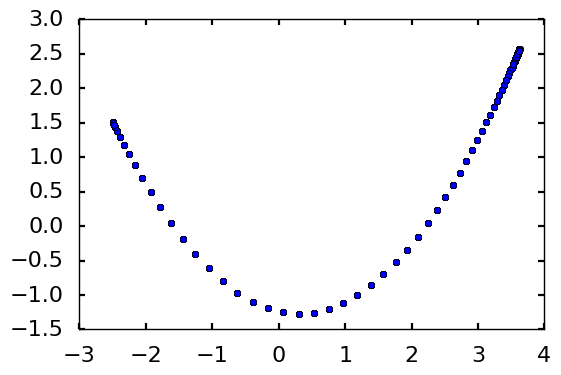

In [49]:
X_pca = PCA(n_components=2)
X_pca = X_pca.fit_transform(prod_df)
plt.scatter(X_pca[:, 0], X_pca[:, 1])


In [140]:
subset_df= ewg_prd_df[ewg_prd_df['Type'].isin(acne_types)]


                                                    allergy_imm_tox_score  \
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTY1L0Vzc2VuY2Vfb2Z...              39.266667   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTY2L0Vzc2VuY2Vfb2Z...              39.266667   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTY3L0Vzc2VuY2Vfb2Z...              38.000000   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTc1L0Vzc2VuY2Vfb2Z...               0.000000   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTcxL0Vzc2VuY2Vfb2Z...               6.333333   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3NTczL0Vzc2VuY2Vfb2Z...               6.333333   
L3NraW5kZWVwL3Byb2R1Y3QvMTA3OTIvRXVjZXJpbl9Pcml...             149.466667   
L3NraW5kZWVwL3Byb2R1Y3QvMTAwMDAyL0x1bWVuZV9TZW5...              19.000000   
L3NraW5kZWVwL3Byb2R1Y3QvMTAwMDM5L0FxdWFfR2x5Y29...             154.533333   
L3NraW5kZWVwL3Byb2R1Y3QvMTAwMTI4L1Zhc2VsaW5lX0l...             135.533333   
L3NraW5kZWVwL3Byb2R1Y3QvMTAwMTkwL0NWU19Db29sX01...             126.666667   
L3NraW5kZWVwL3Byb2R1Y3QvMTAwMjAyL0plcmdlbnNfU2h...             139.333333   

In [141]:

n = subset_df.shape[0]
X = np.zeros((n,len(ing_cnts.keys())))
prod_df = pd.DataFrame(X,columns = ing_cnts.keys())
#prod_df = dok_matrix(X)

for i in range(n):
    temp_ing = subset_df.iloc[i]['New_List']
    for col_name in range(len(temp_ing)):
        prod_df.loc[i][col_name] += 1

In [158]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(prod_df)


In [160]:
for i in range(50):
    print(i , '\t',np.sum(pca.explained_variance_ratio_[0:i]))

0 	 0.0
1 	 0.535616166584
2 	 0.70027644976
3 	 0.778339628872
4 	 0.824296677137
5 	 0.854452929003
6 	 0.876200298858
7 	 0.892454829953
8 	 0.905238702826
9 	 0.915424194137
10 	 0.923821374626
11 	 0.930841136959
12 	 0.936771014512
13 	 0.941973082481
14 	 0.946517437266
15 	 0.95048993412
16 	 0.954045978417
17 	 0.95719628024
18 	 0.960093507953
19 	 0.962693577343
20 	 0.965090251695
21 	 0.967344322445
22 	 0.969371521906
23 	 0.971288825897
24 	 0.973067598728
25 	 0.974764389691
26 	 0.976370807778
27 	 0.977891556968
28 	 0.979350794448
29 	 0.980751303756
30 	 0.982113052628
31 	 0.983444692888
32 	 0.984712456574
33 	 0.985944773491
34 	 0.987130186196
35 	 0.988249055975
36 	 0.989284071427
37 	 0.990311251889
38 	 0.991245149064
39 	 0.992092771939
40 	 0.992869082344
41 	 0.99362709175
42 	 0.994321112535
43 	 0.994936994623
44 	 0.995477658948
45 	 0.995958901644
46 	 0.996418085571
47 	 0.996851352739
48 	 0.997224577735
49 	 0.99755221305


In [161]:
tsne = TSNE(n_components=2, perplexity = 30)
X_tsne = tsne.fit_transform(X_pca)

In [169]:
typ_list = Counter(subset_df['Type']).most_common(11)
track_2color = {typ_list[0][0]:"#55ff33", # blak
                typ_list[1][0]:"#FFFF00", #yellow
                typ_list[2][0]:"#1CE6FF", #cyan
                typ_list[3][0]: "#FF34FF", #pink 
                typ_list[4][0]:"#FF4A46", #red
                typ_list[5][0]:"#FFC300",  # green forest
                typ_list[6][0]:"#006FA6", # blue ocean
                typ_list[7][0]:"#A30059",# purple
                typ_list[8][0]:"#FFDBE5",  #light pink
                typ_list[9][0]: "#7A4900",  # gold or brown 
                #Add more later
                typ_list[10][0]:"#FDFFFF", # White 
                'Other': '#FFFFFF'
               }

color_vector = list()

i = 0
for v in subset_df['Type']:
    #typ = get_popular(v)
    try:
        color_vector.append(track_2color[v])
    except:
        color_vector.append('#FFFFFF')
        # ensemble the legend
lgend = list()
for l, c in track_2color.items():
    lgend.append(mpatches.Patch(color=c, label=l))

In [170]:
print(prod_df.shape)

(42851, 8919)


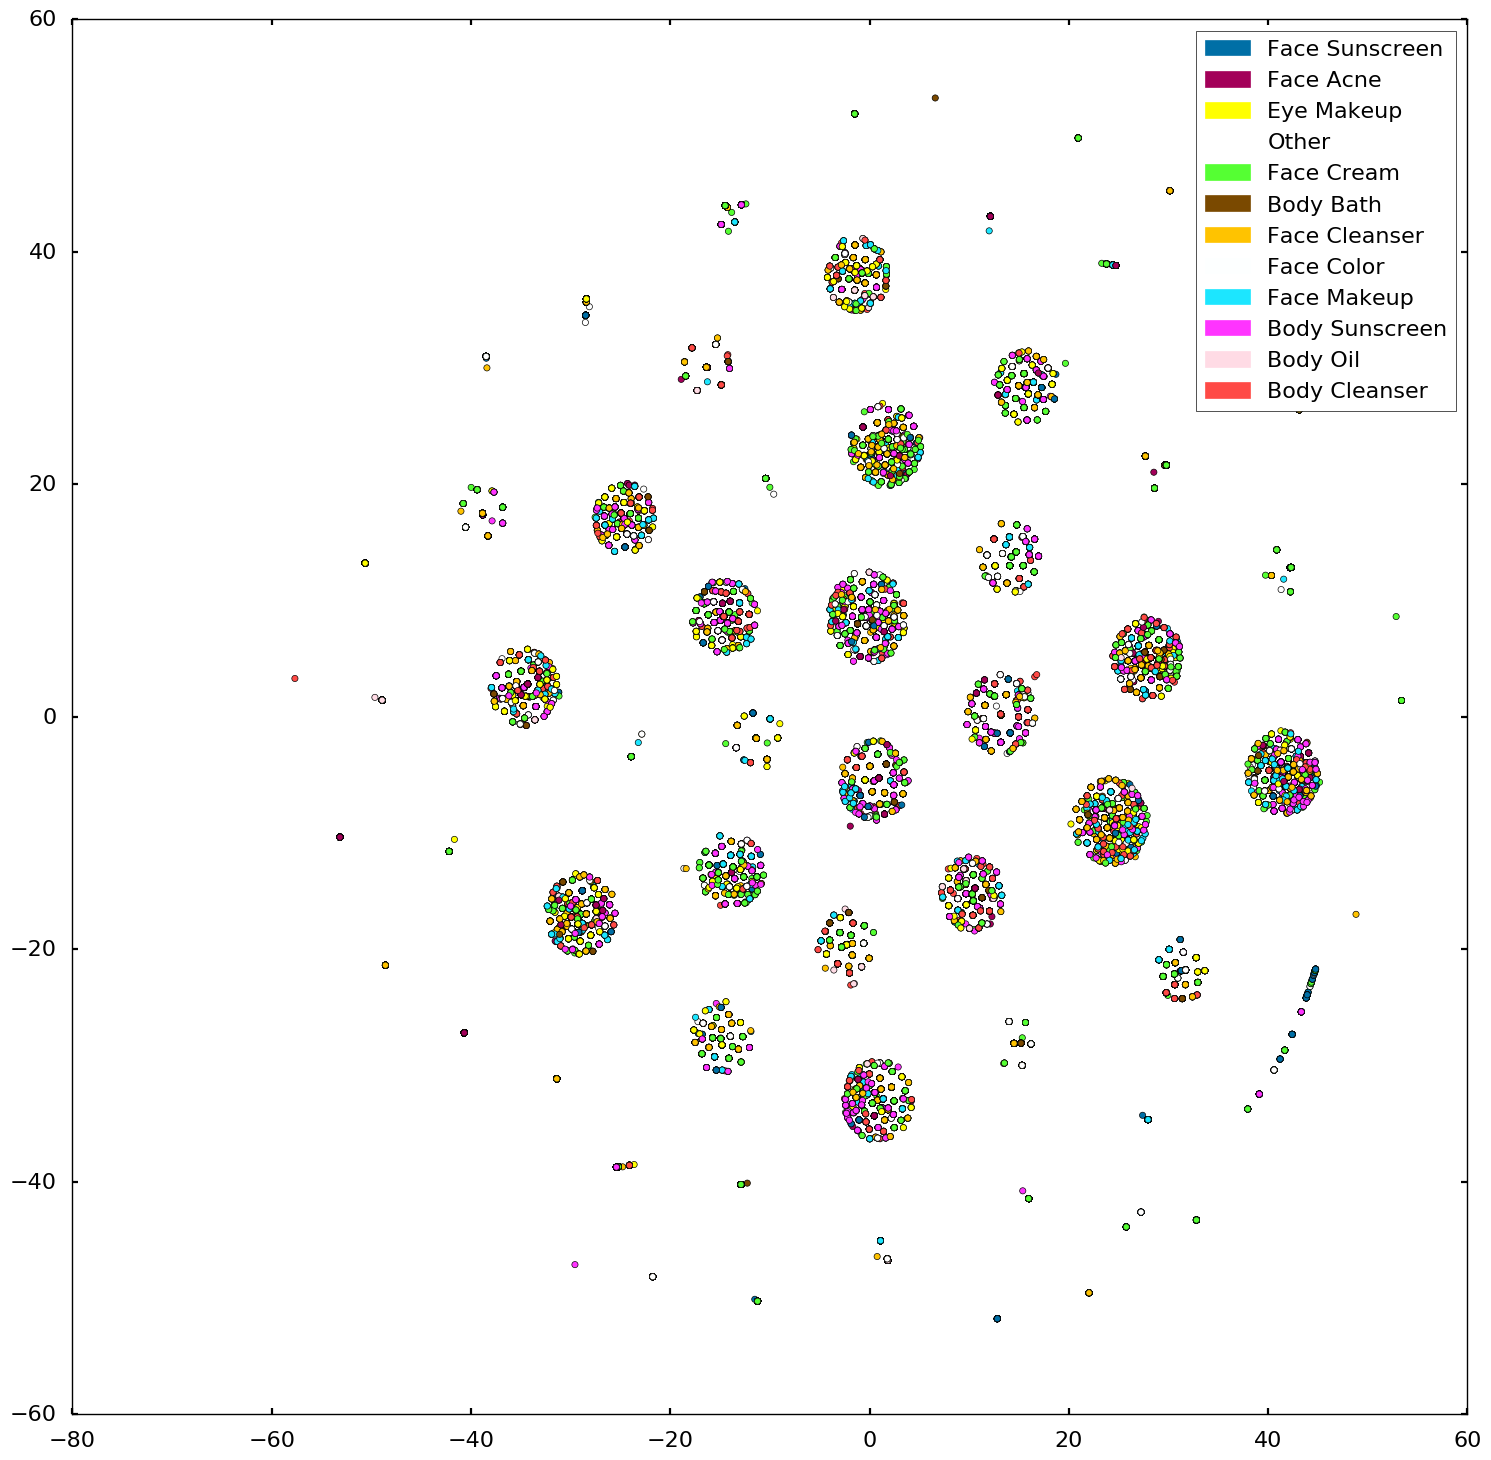

In [171]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector)
plt.legend(handles=lgend)
plt.xlim()

(-25, -5)

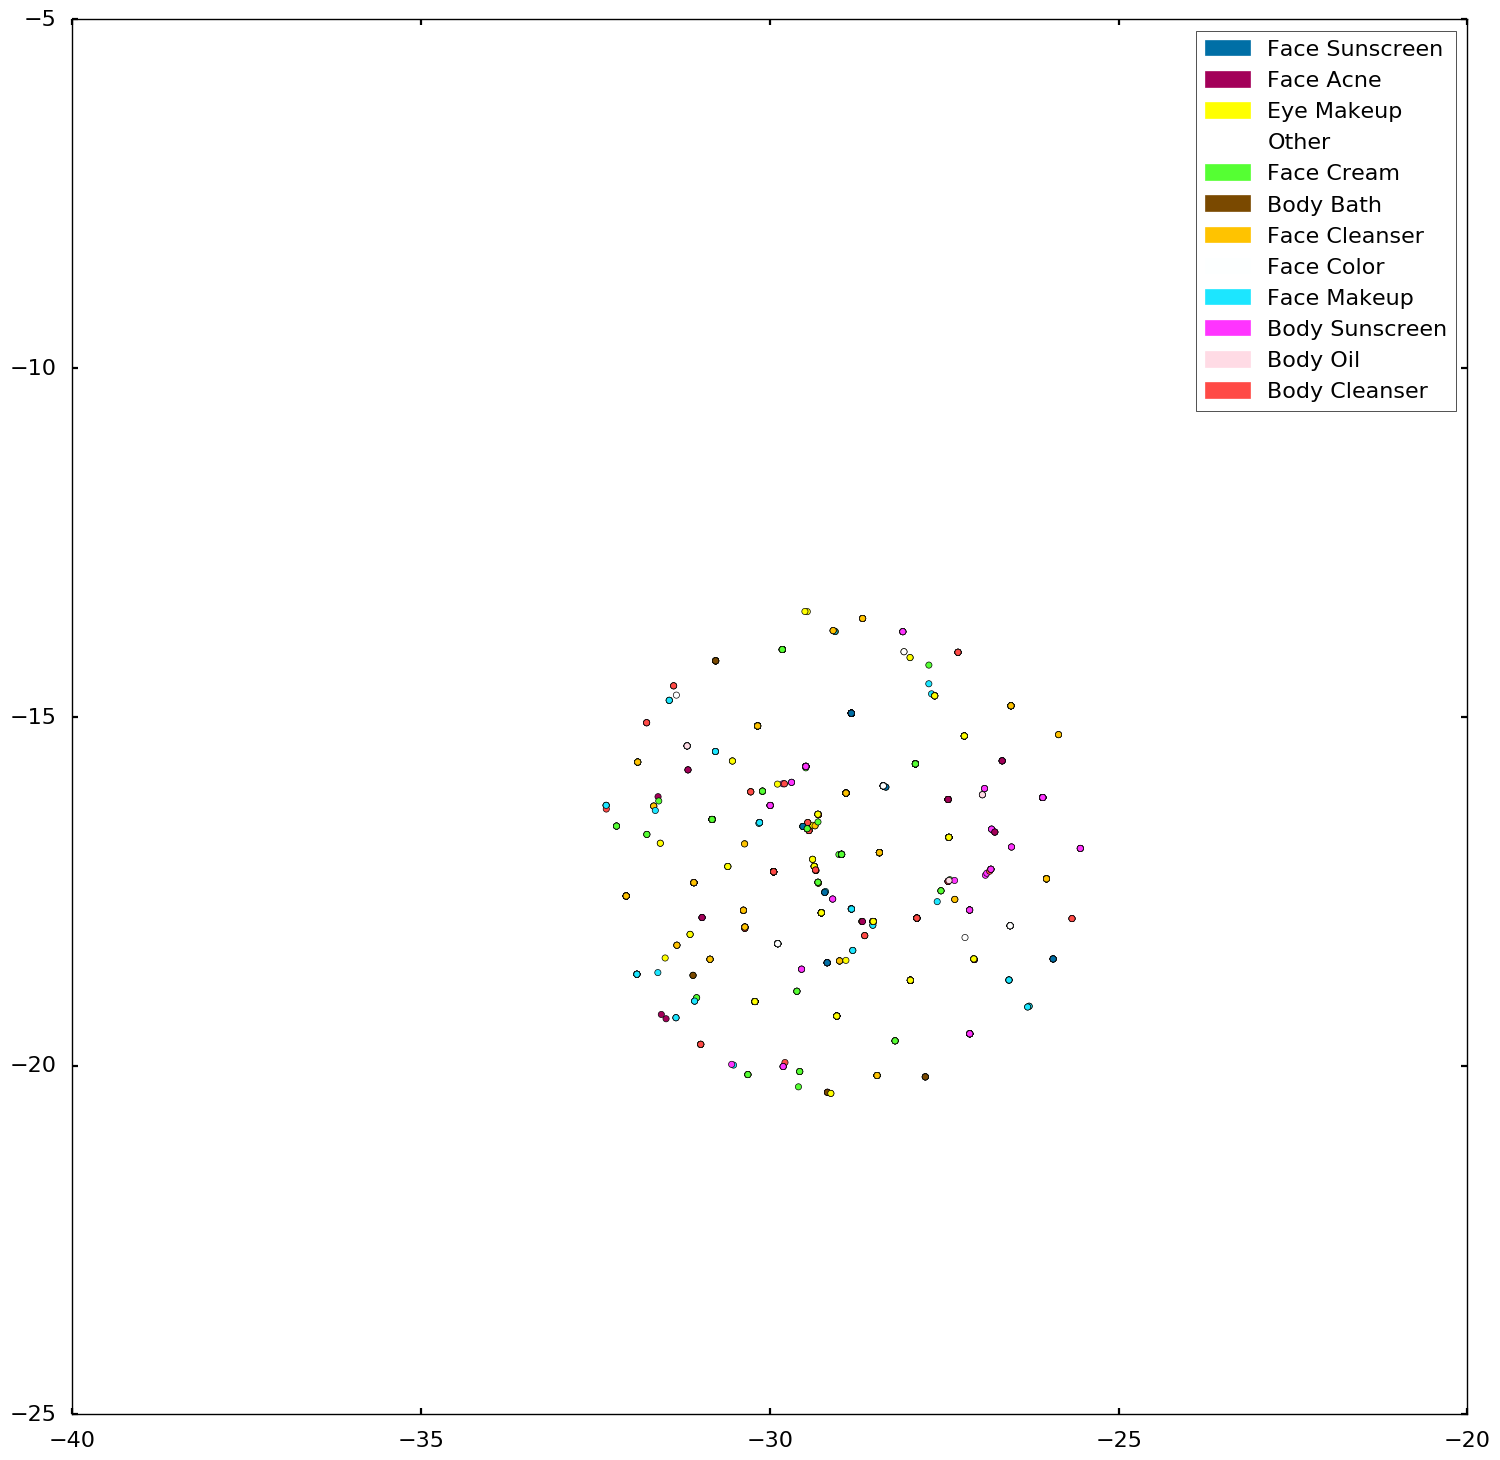

In [174]:
sns.set_context("poster")
fig, ax = plt.subplots(figsize=(18,18))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_vector)
plt.legend(handles=lgend)
plt.xlim([-40,-20])
plt.ylim([-25,-5])

In [191]:
cluster = pd.DataFrame(X_tsne)
cluster_i = cluster[(cluster[0] > -40) & (cluster[0] < -15) & (cluster[1] > -25) & (cluster[1] < -5)].index
for i in cluster_i:
    print(subset_df.iloc[i]['New_List'])

['FRAGRANCE', 'PROPYLPARABEN', 'BUTYLPARABEN', 'DMDM HYDANTOIN (FORMALDEHYDE RELEASER)', 'TRIETHANOLAMINE', 'ETHYLPARABEN', 'METHYLPARABEN', 'PHENOXYETHANOL', 'TOCOPHERYL ACETATE', 'DIMETHICONE', 'ALOE BARBADENSIS (ALOE VERA) GEL', 'GLYCERIN', 'CITRIC ACID', 'CASTOR WAX', 'GOAT MILK', 'GLYCINE SOJA (SOYBEAN) OIL', 'ALLANTOIN', 'CETYL ALCOHOL', 'ELAEIS GUINEENSIS (AFRICAN OIL PALM) OIL', 'GLYCERYL MONOSTEARATE', 'HYDROGENATED CASTOR OIL', 'HYDROGENATED SOYBEAN OIL', 'ISOPROPYL PALMITATE', 'STEARIC ACID', 'WATER']
['2-BROMO-2-NITROPROPANE-1,3-DIOL (FORMALDEHYDE RELEASER)', 'FRAGRANCE', 'CETEARETH-12', 'PROPYLPARABEN', 'ANTHEMIS NOBILIS (CHAMOMILE)', 'METHYLPARABEN', 'TOCOPHERYL ACETATE', 'CETEARETH-20', 'ALOE BARBADENSIS (ALOE VERA) GEL', 'ALOE BARBADENSIS (ALOE VERA)', 'PROPYLENE GLYCOL', 'CAMELLIA SINENSIS (GREEN TEA) LEAF EXTRACT', 'GLYCERIN', 'CITRIC ACID', 'CAMELLIA OLEIFERA (TEA-OIL CAMELLIA) LEAF EXTRACT', 'CHAMOMILLA RECUTITA (MATRICARIA) FLOWER EXTRACT', 'CENTAUREA CYANUS (CORNF

['POTASSIUM OLEATE', 'SAPONIFIED HELIANTHUS ANNUUS (SUNFLOWER) OIL', 'SAPONIFIED COCOS NUCIFERA (COCONUT) OIL', 'VEGETABLE GLYCERIN', 'CITRUS PARADISI (GRAPEFRUIT) OIL', 'ROSMARINUS OFFICINALIS (ROSEMARY) OIL', 'POTASSIUM PALM KERNELATE', 'PALM KERNEL ACID', 'SIMMONDSIA CHINENSIS (JOJOBA) ESTERS', 'KAOLIN', 'POTASSIUM COCOATE', 'POTASSIUM CITRATE', 'BUTYROSPERMUM PARKII (SHEA BUTTER)', 'MELALEUCA ALTERNIFOLIA (TEA TREE) LEAF OIL', 'WATER']
['SODIUM OLEATE', 'SODIUM MYRISTATE', 'GLYCERIN', 'TETRASODIUM ETIDRONATE', 'SORBITOL', 'SODIUM LAURATE', 'KAOLIN', 'SODIUM STEARATE', 'PENTASODIUM PENTETATE', 'BUTYROSPERMUM PARKII (SHEA BUTTER)', 'PERSEA GRATISSIMA (AVOCADO) OIL', 'TOCOPHEROL', 'STEARIC ACID', 'LAURIC ACID', 'WATER']
['ALOE BARBADENSIS (ALOE VERA) GEL', 'POLYAMINOPROPYL BIGUANIDE', 'PRUNUS ARMENIACA (APRICOT) KERNEL', 'VEGETABLE GLYCERIN', 'ARTEMISIA PALLENS (DAVANA) OIL', 'ROSMARINUS OFFICINALIS (ROSEMARY) LEAF EXTRACT', 'SORBITAN OLIVATE', 'CALENDULA OFFICINALIS (POT MARIGOLD) FL